# Training and testing data set split

In [1]:
# import packages
import pandas as pd
import re
import numpy as np
from nltk import ngrams
from matplotlib import pyplot as plt

In [2]:
# import internal modules
import file_path_management as fpath
import public_library as plib
import dataframe_columns as df_col

2023-11-06 11:38:42 GM01X680 metapub.config[61543] WARNING NCBI_API_KEY was not set.


## Main program

In [3]:
# # Select 300 random papers from poten_litera_ids_ftl_filled_filtered for testing
# source_path = fpath.poten_litera_ids_ftl_filled_filtered
# output_path = fpath.poten_litera_testing_set_300

# # Clear the file
# plib.clear_file(output_path)

# df = pd.read_csv(source_path, header=None, sep=',')
# df.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS"]
# df = df.sample(n=300, random_state=1, axis='index', ignore_index=False)
# df.reset_index(drop=True, inplace=True)
# df.to_csv(output_path, header=True, index=False)
# # --------------------start of test code--------------------
# source_path = fpath.poten_litera_testing_set_300
# df = pd.read_csv(source_path, header=0, sep=',')
# print(df.shape)
# # (300, 12)
# # ---------------------end of test code---------------------

In [4]:
# # Process, correct the INDEX in potential_related_literature_testing_set_300_read.csv
# input_path = fpath.poten_litera_testing_set_300_read
# output_path = fpath.poten_litera_testing_set_300_read_index_corrected
# # plib.clear_file(output_path)
# db_path = fpath.poten_litera_db

# df_input = pd.read_csv(input_path, header=0, sep=',')
# df_input.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS", "RELEVANCE"]
# df_db = pd.read_csv(db_path, header=None, sep=',')
# df_db.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS"]
# df_db = df_db.fillna(0)
# df_db = df_db.astype({"PMID": int})
# # print(df_input.shape)
# # print(df_input.head(5))
# # (300, 12)
# # print(df_db.shape)
# # print(df_db.head(10))
# # (10776, 11)

# for ind in df_input.index:
#     index = df_input.at[ind, "INDEX"]
#     doi = df_input.at[ind, "DOI"]
#     pmid = df_input.at[ind, "PMID"]
#     # print(pmid, df_db.at[ind, "PMID"])
#     # print(pmid.type(), df_db.at[ind, "PMID"].type())
#     pmcid = df_input.at[ind, "PMCID"]
#     full_text_url = df_input.at[ind, "FULL_TEXT_URL"]
#     full_text_source = df_input.at[ind, "FULL_TEXT_SOURCE"]
#     title = df_input.at[ind, "TITLE"].lower()

#     if doi == doi:
#         try:
#             index = df_db.loc[df_db["DOI"] == doi, 'INDEX'].values[0]
#             df_input.at[ind, "INDEX"] = index
#         except:
#             print("DOI not found in db:", df_input.at[ind, "INDEX"], df_input.at[ind, "RELEVANCE"])
#             df_input.drop(ind, inplace=True)
#     elif pmid == pmid:
#         try:
#             index = df_db.loc[int(df_db["PMID"])==int(pmid), 'INDEX'].values[0]
#             df_input.at[ind, "INDEX"] = index
#         except:
#             print("PMID not found in db:", df_input.at[ind, "INDEX"], df_input.at[ind, "RELEVANCE"])
#             df_input.drop(ind, inplace=True)
#     elif pmcid == pmcid:
#         index = df_db.loc[df_db["PMCID"] == pmcid, 'INDEX'].values[0]
#         df_input.at[ind, "INDEX"] = index
#     elif title.lower() == title.lower():
#         index = df_db.loc[df_db["TITLE"].str.lower() == title, 'INDEX'].values[0]
#         df_input.at[ind, "INDEX"] = index
#     else:
#         print("ALL 4 identifiers and title are missing:", df_input.at[ind, "INDEX"], df_input.at[ind, "RELEVANCE"])
    
# df_input.reset_index(drop=True, inplace=True)
# df_input.to_csv(output_path, header=True, index=False)

In [5]:
# # check the corrected file
# corrected = fpath.poten_litera_testing_set_300_read_index_corrected
# df_input = pd.read_csv(corrected, header=0, sep=',')
# print(df_input.shape)
# # (292, 12)
# print(df_input.head(5))

In [6]:
# # test if the result matches the db
# result_path = fpath.poten_litera_testing_set_300_read_index_corrected
# db_path = fpath.poten_litera_db

# df_result= pd.read_csv(result_path, header=0, sep=',')
# df_result.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS", "RELEVANCE"]
# df_db = pd.read_csv(db_path, header=None, sep=',')
# df_db.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS"]

# # print(df_result.shape)
# # print(df_result.head(5))
# # (292, 12)
# # print(df_db.shape)
# # print(df_db.head(10))
# # (10776, 11)

# for ind in df_result.index:
#     index = int(df_result.at[ind, "INDEX"])
#     title = df_result.at[ind, "TITLE"].lower()
#     # title = ''.join([char for char in df_result.at[ind, "TITLE"].lower() if re.match(r'[a-z\s-]', char)])
#     cleaned_title = re.sub(r'\s+', ' ', title).strip().replace(".", "")
#     title_db = df_db.loc[df_db["INDEX"].astype(int) == index, 'TITLE'].values[0].lower()
#     # title_db = ''.join([char for char in df_db.loc[df_db["INDEX"].astype(int) == index, 'TITLE'].values[0].lower() if re.match(r'[a-z\s-]', char)])
#     cleaned_title_db = re.sub(r'\s+', ' ', title_db).strip().replace(".", "")
    
#     if cleaned_title == cleaned_title_db:
#         pass
#     else:
#         # pass
#         print(index)
#         print(cleaned_title)
#         print(cleaned_title_db)
#         print("\n")

In [7]:
# # # select another 708 random papers from poten_litera_db to form 1000 papers as training and testing set
# db_path = fpath.poten_litera_db
# test_300_path = fpath.poten_litera_testing_set_300_read_index_corrected
# test_708_path = fpath.poten_litera_testing_set_708
# plib.clear_file(test_708_path)

# df_db = pd.read_csv(db_path, header=None, sep=',')
# df_db.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS"]
# df_300 = pd.read_csv(test_300_path, header=0, sep=',')
# df_300.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS", "RELEVANCE"]

# # Get the indices of the previously selected 300 rows
# selected_indices = df_300['INDEX'].values
# # print(selected_indices)

# # Drop the previously selected 300 rows from the original dataframe
# df_remaining = df_db[~df_db['INDEX'].isin(selected_indices)]

# # Randomly sample 708 rows from the remaining rows
# df_708 = df_remaining.sample(n=708, random_state=42)  # Change random_state if needed
# df_708['RELEVANCE'] = np.nan
# df_708.reset_index(drop=True, inplace=True)

# df_708.to_csv(test_708_path, header=True, index=False)

In [8]:
# # combine and obtain 1000 papers as training-test-set
# test_300_path = fpath.poten_litera_testing_set_300_read_index_corrected
# test_708_path = fpath.poten_litera_testing_set_708
# test_1000_path = fpath.poten_litera_testing_set_1000
# plib.clear_file(test_1000_path)

# df_300 = pd.read_csv(test_300_path, header=0, sep=',')
# df_708 = pd.read_csv(test_708_path, header=0, sep=',')
# df_1000 = pd.concat([df_300, df_708], axis=0)
# df_1000.reset_index(drop=True, inplace=True)
# df_1000.to_csv(test_1000_path, header=True, index=False)

In [9]:
# # check if there're duplicates in the 1000 papers
# test_1000_path = fpath.poten_litera_testing_set_1000
# df_1000 = pd.read_csv(test_1000_path, header=0, sep=',')
# df_1000.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS", "RELEVANCE"]
# print(df_1000.shape)
# # (1000, 12)

# print(len(set(df_1000['INDEX'])))
# # 1000

In [10]:
# # test if poten_litera_testing_set_1000 matches poten_litera_db
# test_1000_path = fpath.poten_litera_testing_set_1000
# db_path = fpath.poten_litera_db

# df_result= pd.read_csv(test_1000_path, header=0, sep=',')
# df_result.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS", "RELEVANCE"]
# df_db = pd.read_csv(db_path, header=None, sep=',')
# df_db.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS"]

# # print(df_result.shape)
# # print(df_result.head(5))
# # # (1000, 12)
# # print(df_db.shape)
# # print(df_db.head(10))
# # # (10776, 11)

# for ind in df_result.index:
#     index = int(df_result.at[ind, "INDEX"])
#     title = df_result.at[ind, "TITLE"].lower()
#     # title = ''.join([char for char in df_result.at[ind, "TITLE"].lower() if re.match(r'[a-z\s-]', char)])
#     cleaned_title = re.sub(r'\s+', ' ', title).strip().replace(".", "")
#     title_db = df_db.loc[df_db["INDEX"].astype(int) == index, 'TITLE'].values[0].lower()
#     # title_db = ''.join([char for char in df_db.loc[df_db["INDEX"].astype(int) == index, 'TITLE'].values[0].lower() if re.match(r'[a-z\s-]', char)])
#     cleaned_title_db = re.sub(r'\s+', ' ', title_db).strip().replace(".", "")
    
#     if cleaned_title == cleaned_title_db:
#         pass
#     else:
#         # pass
#         print(index)
#         print(cleaned_title)
#         print(cleaned_title_db)
#         print("\n")

1000


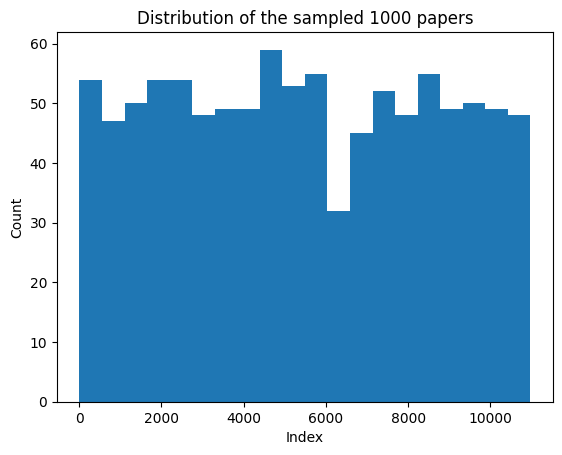

In [12]:
# # draw the distribution of the sampled 1000 papers to see if it's actually randomly sampled
# test_1000_path = fpath.poten_litera_testing_set_1000
# df_1000 = pd.read_csv(test_1000_path, header=0, sep=',')
# df_1000.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS", "RELEVANCE"]

# index_list = df_1000['INDEX'].tolist()
# index_list.sort()
# # print(index_list)
# print(len(index_list))

# # draw the histogram
# plt.hist(index_list, bins=20)
# plt.xlabel("Index")
# plt.ylabel("Count")
# plt.title("Distribution of the sampled 1000 papers")
# plt.show()